In [5]:
import matplotlib.pyplot as plt
from matplotlib.axes import Axes
import scienceplots

plt.style.use("science")

In [6]:
def avg_leeds(acetone, benzene, ethanol):
    # weight average of the three Leeds sets based on dataset size
    return (acetone * 324 + benzene * 396 + ethanol * 570) / (324 + 396 + 570)

In [7]:
avg_leeds(2.1720, 1.9709, 2.1013)

2.079027441860465

In [8]:
training_size = [20, 50, 100, 200, 500, 1000, 2000, 3500, 5215]
ssobolev_solprop_results = [
    1.0418629883823745,
    1.0171012180341188,
    0.9700775254855594,
    0.9406649656634716,
    0.8834544365106561,
    0.8393925176580768,
    0.8248087425624152,
    0.853505934877821,
    0.8595163459912102,
]
nonsobolev_solprop_results = [
    1.1436874249424827,
    1.0637085011471725,
    1.0022459611431949,
    0.9528391657354519,
    0.8680445122057591,
    0.859039484523934,
    0.8457766690955398,
    0.830510717928541,
    0.8444583411773573,
]
sobolev_leeds_results = [avg_leeds(*l) for l in [
    [1.0214523699600964, 1.1375340512667533, 1.1328123480440166],
    [1.1445984578560904, 1.0741360634019015, 0.9806277851474099],
    [0.9824772653922471, 1.053279863934111, 1.0440536375339993],
    [0.9886564447475238, 1.198750143956717, 0.9976790427045775],
    [0.8780849195871343, 1.1220781965508504, 1.0720160884014354],
    [0.8476945723943443, 1.0184929729081822, 1.0781711441775639],
    [0.889450424547726, 0.963954533370384, 1.0969327621408003],
    [0.8203917930094193, 0.9611658512621661, 1.0599867267009033],
    [0.8959405971059528, 0.9896782756421798, 1.092165613130318],
]]
nonsobolev_leeds_results = [avg_leeds(*l) for l in [
    [0.97168587039027, 1.1492189126986598, 1.2765176215244949],
    [0.9106621987725708, 1.0431210169206901, 1.0255120071830979],
    [0.9462914518397051, 1.0384951404757479, 1.074411221833901],
    [1.0113215348162785, 1.1935066157487604, 1.0653141497619651],
    [0.8640132448055345, 1.0283255299740153, 1.0697676126816957],
    [0.841687796264228, 1.0210924653837194, 1.1106002011543064],
    [0.8290204611394121, 0.9642713111497316, 1.1090806403344635],
    [0.8169021167583466, 0.9977013498305167, 1.0783168761957738],
    [0.8949971365997584, 0.9816668950031842, 1.0714985773027317],
]]
lower_experimental_limit = [0.5] * len(training_size)
upper_experimental_limit = [1.0] * len(training_size)

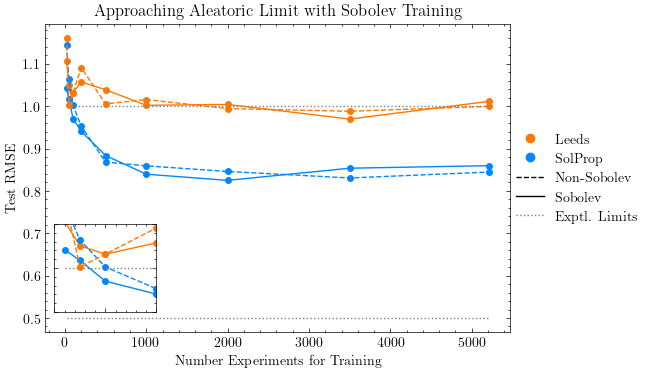

In [9]:
fig = plt.figure(figsize=(6, 4))
plt.plot(training_size, ssobolev_solprop_results, label="_Sobolev SolProp", linestyle="-", color="#0087FF", marker="o", markersize=4)
plt.plot(training_size, sobolev_leeds_results, label="_Sobolev Leeds", linestyle="-", color="#FF7800", marker="o", markersize=4)
plt.plot(training_size, nonsobolev_solprop_results, label="_Non-Sobolev SolProp", linestyle="--", color="#0087FF", marker="o", markersize=4)
plt.plot(training_size, nonsobolev_leeds_results, label="_Non-Sobolev Leeds", linestyle="--", color="#FF7800", marker="o", markersize=4)
plt.plot(training_size, lower_experimental_limit, label="_Lower Exptl. Limit", linestyle=":", color="#7f7f80")
plt.plot(training_size, upper_experimental_limit, label="_Upper Exptl. Limit", linestyle=":", color="#7f7f80")
# legend entries
plt.plot([], [], label="Leeds", color="#FF7800", marker="o", linestyle="")
plt.plot([], [], label="SolProp", color="#0087FF", marker="o", linestyle="")
plt.plot([], [], label="Non-Sobolev", color="k", marker="", linestyle="--")
plt.plot([], [], label="Sobolev", color="k", marker="", linestyle="-")
plt.plot([], [], label="Exptl. Limits", color="#7f7f80", marker="", linestyle=":")
plt.xlabel("Number Experiments for Training")
plt.ylabel("Test RMSE")
# plt.xscale('log', base=2)
plt.title("Approaching Aleatoric Limit with Sobolev Training")
plt.legend(loc="center right", bbox_to_anchor=(1.3, 0.5))

inset_ax: Axes = fig.add_axes([0.14, 0.16, 0.17, 0.22])  # [left, bottom, width, height]
inset_ax.plot(training_size, ssobolev_solprop_results, label="_Sobolev SolProp", linestyle="-", color="#0087FF", marker="o", markersize=4)
inset_ax.plot(training_size, sobolev_leeds_results, label="_Sobolev Leeds", linestyle="-", color="#FF7800", marker="o", markersize=4)
inset_ax.plot(training_size, nonsobolev_solprop_results, label="_Non-Sobolev SolProp", linestyle="--", color="#0087FF", marker="o", markersize=4)
inset_ax.plot(training_size, nonsobolev_leeds_results, label="_Non-Sobolev Leeds", linestyle="--", color="#FF7800", marker="o", markersize=4)
inset_ax.plot(training_size, lower_experimental_limit, label="_Lower Exptl. Limit", linestyle=":", color="#7f7f80")
inset_ax.plot(training_size, upper_experimental_limit, label="_Upper Exptl. Limit", linestyle=":", color="#7f7f80")
inset_ax.set_xlim(0, 200)
inset_ax.set_ylim(0.9, 1.1)
inset_ax.set_yticklabels([])
inset_ax.set_xticklabels([])
plt.savefig("aleatoric_limit.svg")
plt.show()